#***Predicting NDVI Values from GLOBE Land Cover RGB Measurements with Multiple Linear Regression***
> Prachi Ingle, Neeha Kurelli, Grace Knuth

> NASA SEES 2020 Mosquito Mapper Independent Student Project




---



#Section 1 -- Upload GLOBE Land Cover CSV file & Convert to pandas dataframe
> NOTE: This csv was downloaded 8:48pm, July 20, 2020

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from google.colab import files

In [ ]:
#Upload GLOBE csv & save as pandas df
import pandas as pd

csv_uploaded = files.upload()
for fn in csv_uploaded.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  globe_df = pd.read_csv("{name}".format(name=fn))

#Note: If this ^^ gives this error : TypeError: Cannot read property '_uploadFiles' of undefined : then that means you cannot run in incognito mode .. run in normal window

Saving dv_land_covers_07-20-2020.csv to dv_land_covers_07-20-2020.csv
User uploaded file "dv_land_covers_07-20-2020.csv"


In [ ]:
print(globe_df.shape)
globe_df

(14145, 7)


School Name  ...                                     Measured Value
0      Abdullrahaman bin Abybakar School  ...  https://data.globe.gov/system/photos/2019/02/2...
1      Abdullrahaman bin Abybakar School  ...  https://data.globe.gov/system/photos/2019/10/1...
2      Abdullrahaman bin Abybakar School  ...  https://data.globe.gov/system/photos/2019/02/2...
3      Abdullrahaman bin Abybakar School  ...  https://data.globe.gov/system/photos/2019/10/1...
4      Abdullrahaman bin Abybakar School  ...  https://data.globe.gov/system/photos/2019/10/1...
...                                  ...  ...                                                ...
14140                 Школа-гимназия №69  ...  https://data.globe.gov/system/photos/2019/04/1...
14141                 Школа-гимназия №69  ...  https://data.globe.gov/system/photos/2019/04/2...
14142                 Школа-гимназия №69  ...  https://data.globe.gov/system/photos/2019/04/0...
14143                 Школа-гимназия №69  ...  https://data.globe.gov/system/photos/2019/04/1...
14144                 Школа-гимназия №69  ...  https://data.globe.gov/system/photos/2019/04/2...

[14145 rows x 7 columns]

#Section 2 -- Organize globe_df
> Organize by date, then user, then location

> Remove unneccessary entries

##**Step 1** -- Sort Values by Date, School Name, Site Name


In [ ]:
globe_df = globe_df.sort_values(by=['Measured At','School Name','Site Name'])
globe_df = globe_df[['Measured At','School Name','Site Name','Latitude','Longitude','Elevation','Measured Value']]
globe_df.reset_index(drop=True, inplace=True)
globe_df.head()

Measured At  ...                                     Measured Value
0  1995-05-01 00:00:00  ...  https://data.globe.gov/system/photos/1996/04/1...
1  1995-06-16 00:00:00  ...  https://data.globe.gov/system/photos/1995/10/0...
2  1995-08-23 00:00:00  ...  https://data.globe.gov/system/photos/1995/11/3...
3  1995-10-01 00:00:00  ...  https://data.globe.gov/system/photos/1995/10/2...
4  1995-10-13 00:00:00  ...  https://data.globe.gov/system/photos/1995/10/2...

[5 rows x 7 columns]

##**Step 2** -- Find & remove duplicate entries
> Note: Duplicate entries mean that ALL column values match for that particular row to a previous row.

Find Duplicate Entries

In [ ]:
duplicateRowsDF = globe_df[globe_df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
             Measured At  ...                                     Measured Value
29   1996-11-11 00:00:00  ...  https://data.globe.gov/system/photos/1996/10/2...
149  2000-12-05 00:00:00  ...  https://data.globe.gov/system/photos/2016/11/2...
150  2000-12-05 00:00:00  ...  https://data.globe.gov/system/photos/2016/11/2...
152  2000-12-05 00:00:00  ...  https://data.globe.gov/system/photos/2016/11/2...
154  2000-12-05 00:00:00  ...  https://data.globe.gov/system/photos/2016/11/2...
..                   ...  ...                                                ...
823  2016-05-13 00:00:00  ...  https://data.globe.gov/system/photos/2016/05/1...
825  2016-05-13 00:00:00  ...  https://data.globe.gov/system/photos/2016/05/1...
826  2016-05-13 00:00:00  ...  https://data.globe.gov/system/photos/2016/05/1...
831  2016-10-20 00:00:00  ...  https://data.globe.gov/system/photos/2016/10/2...
832  2016-10-20 00:00:00  ...  https://data

Remove Duplicate Entries

In [ ]:
globe_df.drop_duplicates(keep='last',inplace=True,ignore_index=True)
globe_df.tail()

Measured At  ...                                     Measured Value
14024  2020-07-20 08:50:00  ...  https://data.globe.gov/system/photos/2020/07/2...
14025  2020-07-20 16:55:00  ...  https://data.globe.gov/system/photos/2020/07/2...
14026  2020-07-20 17:19:00  ...  https://data.globe.gov/system/photos/2020/07/2...
14027  2020-07-20 19:17:00  ...  https://data.globe.gov/system/photos/2020/07/2...
14028  2020-07-20 20:50:00  ...  https://data.globe.gov/system/photos/2020/07/2...

[5 rows x 7 columns]

In [ ]:
print(globe_df.shape)

(14029, 7)


##**Step 3** -- Remove entries that are NOT from the 2020 SEES group
> Keep entry IF School Name is *United States of America Citizen Science*

In [ ]:
#United States of America Citizen Science
print(type(globe_df))
#globe_df.shape[0] = #rows
globe_df.dropna(inplace=True)
globe_df.shape[0]

indexNames = globe_df[ (globe_df['School Name'] != 'United States of America Citizen Science') ].index
globe_df.drop(indexNames , inplace=True)
globe_df.reset_index(drop=True, inplace=True)
globe_df

<class 'pandas.core.frame.DataFrame'>


Measured At  ...                                     Measured Value
0     2018-09-12 23:08:00  ...  https://data.globe.gov/system/photos/2018/09/1...
1     2018-09-13 20:28:00  ...  https://data.globe.gov/system/photos/2018/09/1...
2     2018-09-14 00:04:00  ...  https://data.globe.gov/system/photos/2018/09/1...
3     2018-09-14 22:49:00  ...  https://data.globe.gov/system/photos/2018/09/1...
4     2018-09-15 14:03:00  ...  https://data.globe.gov/system/photos/2018/09/1...
...                   ...  ...                                                ...
4974  2020-07-18 20:19:00  ...  https://data.globe.gov/system/photos/2020/07/1...
4975  2020-07-19 17:53:00  ...  https://data.globe.gov/system/photos/2020/07/1...
4976  2020-07-20 16:55:00  ...  https://data.globe.gov/system/photos/2020/07/2...
4977  2020-07-20 19:17:00  ...  https://data.globe.gov/system/photos/2020/07/2...
4978  2020-07-20 20:50:00  ...  https://data.globe.gov/system/photos/2020/07/2...

[4979 rows x 7 columns]

##**Step 4** -- Remove any entry before Jun 1, 2020
> Official SEES 2020 Start Date: Jun 1, 2020
* So, remove any entry prior to this date

In [ ]:
times = globe_df['Measured At']
print(type(times[0]))
start = -1
for x in range(len(times)):
  if times[x][0:7] == "2020-06":
    start = x
    break
print(start)

#print(globe_df.loc[[start - 1]])
#print(globe_df.loc[[start]])
#print(globe_df.loc[[start + 1]])

<class 'str'>
2451


In [ ]:
indexNames = globe_df[ (globe_df.index < start) ].index
globe_df.drop(indexNames , inplace=True)
globe_df

Measured At  ...                                     Measured Value
2451  2020-06-01 00:41:00  ...  https://data.globe.gov/system/photos/2020/06/0...
2452  2020-06-01 00:45:00  ...  https://data.globe.gov/system/photos/2020/06/0...
2453  2020-06-01 01:13:00  ...  https://data.globe.gov/system/photos/2020/06/0...
2454  2020-06-01 03:30:00  ...  https://data.globe.gov/system/photos/2020/06/0...
2455  2020-06-01 17:56:00  ...  https://data.globe.gov/system/photos/2020/06/0...
...                   ...  ...                                                ...
4974  2020-07-18 20:19:00  ...  https://data.globe.gov/system/photos/2020/07/1...
4975  2020-07-19 17:53:00  ...  https://data.globe.gov/system/photos/2020/07/1...
4976  2020-07-20 16:55:00  ...  https://data.globe.gov/system/photos/2020/07/2...
4977  2020-07-20 19:17:00  ...  https://data.globe.gov/system/photos/2020/07/2...
4978  2020-07-20 20:50:00  ...  https://data.globe.gov/system/photos/2020/07/2...

[2528 rows x 7 columns]

In [ ]:
globe_df.reset_index(drop=True, inplace=True)
globe_df

Measured At  ...                                     Measured Value
0     2020-06-01 00:41:00  ...  https://data.globe.gov/system/photos/2020/06/0...
1     2020-06-01 00:45:00  ...  https://data.globe.gov/system/photos/2020/06/0...
2     2020-06-01 01:13:00  ...  https://data.globe.gov/system/photos/2020/06/0...
3     2020-06-01 03:30:00  ...  https://data.globe.gov/system/photos/2020/06/0...
4     2020-06-01 17:56:00  ...  https://data.globe.gov/system/photos/2020/06/0...
...                   ...  ...                                                ...
2523  2020-07-18 20:19:00  ...  https://data.globe.gov/system/photos/2020/07/1...
2524  2020-07-19 17:53:00  ...  https://data.globe.gov/system/photos/2020/07/1...
2525  2020-07-20 16:55:00  ...  https://data.globe.gov/system/photos/2020/07/2...
2526  2020-07-20 19:17:00  ...  https://data.globe.gov/system/photos/2020/07/2...
2527  2020-07-20 20:50:00  ...  https://data.globe.gov/system/photos/2020/07/2...

[2528 rows x 7 columns]

In [ ]:
globe_df.shape

(2528, 7)

#Section 3 -- Create and download csv_for_appeears
> For AppEEARS, columns should be: 'ID', 'Latitude', 'Longitude'

> AppEEARS Layer = NDVI index & 250m elevation

##**Step 1** -- Determine Mean Elevation
> The mean elevation will be used in the AppEEARS Layer, because we can only input 1 elevation value for the entire inputted csv.

In [ ]:
print('Mean:',np.mean(globe_df['Elevation']))
print('Median:',np.median(globe_df['Elevation']))

Mean: 318.49252373417744
Median: 154.5


Because the Mean & Median are closest to 250m elevation, we will use 250m as overall elevation in the AppEEARS data request.

##**Step 2** -- Copy globe_df & remove extranneous columns
> Keep only 'Latitude' and 'Longitude'

In [ ]:
globe_df_for_appeears = globe_df[['Latitude', 'Longitude']]
globe_df_for_appeears

Latitude  Longitude
0     36.95309 -122.03855
1     37.29716 -122.25194
2     33.04758 -117.29454
3     37.54996 -121.95169
4     37.74782 -122.25083
...        ...        ...
2523  39.04483 -106.80379
2524  39.18563  -86.77885
2525  39.39647 -107.20763
2526  39.39438 -107.22266
2527  18.45481  -66.38585

[2528 rows x 2 columns]

##**Step 3** -- Convert globe_df_for_appeears to csv & Create ID Column
> 'ID' = index

In [ ]:
globe_df_for_appeears.to_csv('csv_for_appeears',index_label='ID')
print(type(globe_df_for_appeears))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(globe_df_for_appeears)

      Latitude  Longitude
0     36.95309 -122.03855
1     37.29716 -122.25194
2     33.04758 -117.29454
3     37.54996 -121.95169
4     37.74782 -122.25083
...        ...        ...
2523  39.04483 -106.80379
2524  39.18563  -86.77885
2525  39.39647 -107.20763
2526  39.39438 -107.22266
2527  18.45481  -66.38585

[2528 rows x 2 columns]


##**Step 4** -- Download csv and send data request to AppEEARS for satellite analysis

> AppEEARS: https://lpdaacsvc.cr.usgs.gov/appeears/

> Note: Need to split into 3 chunks, given AppEEARS entry limit of 1000 samples per request.

In [ ]:
#Note: This downloads WITH column headings! So when inputting into AppEEARS, ignore the first line!
files.download('csv_for_appeears')

NameError: ignored

#Section 4 -- Extracting Median RGB Values from each Image


##**Step 1** -- Compress image by converting to thumbnail
> Note: Max thumbnail size is 100x100 pixels

In [ ]:
def convert_to_thumbnail(img,shape=(100,100,3)):
  return img.thumbnail(shape)

##**Step 2** -- Import required packages

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import cv2
from collections import Counter

from sklearn.cluster import KMeans

import urllib.request

from PIL import Image, ImageEnhance


##**Step 3** -- Create methods to extract median RGB values from each image in globe_df
> NOTE -- Each globe_df image-url points to the NORTH image.

1. Create Method_1: *Extract image from url. Sharpen/brighten image.*
2. Create Method_2: *Return median RGB values from 1 image*
3. Interate through all images in globe_df['Measured Value'], creating an rgb_vals dataframe with each image's median RGB values.



In [ ]:
#Param: String url
#Output: nparray (sharpened & enhanced)
def get_img_from_url(url):
  urllib.request.urlretrieve(url, "sample.png")
  img = Image.open("sample.png")
  #Image.open("sample.png")

  #SHARPEN IMAGE
  sharpener = ImageEnhance.Sharpness(img.convert('RGB'))
  sharpened = sharpener.enhance(2.0)

  #ENHANCE IMAGE BRIGHTNESS
  converter = ImageEnhance.Color(sharpened)
  converted = converter.enhance(1.5)
  return converted


In [ ]:
#Param -- np array that represents an image
#output -- decimal (float)
def get_median_rgb_vals(image_as_array):
  img = image_as_array
  height, width, channels = img.shape
  pixel_rgb = []
  for h in range(height):
    for w in range(width):
      pixel = img[h,w]
      pixel_row = {'pr':pixel[0],'pg':pixel[1],'pb':pixel[2]}
      pixel_rgb.append(pixel_row)
  pixel_rgb = pd.DataFrame(pixel_rgb)

  med_r = np.median(pixel_rgb['pr'])
  med_g = np.median(pixel_rgb['pg'])
  med_b = np.median(pixel_rgb['pb'])
  dict_row = {'r':med_r, 'g':med_g, 'b':med_b}
  return dict_row

##**Step 4** -- Either create rgb_vals or upload the csv if that process has been completed previously

> Note: Generating this csv takes some time. So, if you already have the rgb_vals csv, just upload it using the appropriate code cells!


###If you do NOT have the **rgb_vals** csv, run the cells below to generate:
* Dateframe rgb_vals
* CSV rgb_vals

In [ ]:
rgb_vals = []
i = 0

for url_img in globe_df['Measured Value']:
  #obtain img & compress
  img = get_img_from_url(url_img)
  convert_to_thumbnail(img)

  #convert img to np.array
  img_array = np.array(img)

  #get 3 calc veg indices val
  dict_row = get_median_rgb_vals(img_array)

  rgb_vals.append(dict_row)
  print('"{num}" -- "{veg}"'.format(num=i,veg=dict_row))
  i+=1

rgb_vals = pd.DataFrame(rgb_vals)

rgb_vals.reset_index(inplace=True)
rgb_vals.columns = ['ID','Median r','Median g','Median b']
rgb_vals

In [ ]:
#converts to csv
rgb_vals.to_csv('rgb_vals',index=False)
print(type(rgb_vals))

In [ ]:
#downloads as csv
files.download('rgb_vals')

###If you DO have the rgb_vals csv, run the cells below to upload and save as a Dataframe:

In [ ]:
rgb_vals = files.upload()
for fn in rgb_vals.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  rgb_vals = pd.read_csv("{name}".format(name=fn))


Saving rgb_vals (1) to rgb_vals (1)
User uploaded file "rgb_vals (1)"


In [ ]:
rgb_vals

ID  Median r  Median g  Median b
0        0      83.0      93.0      52.0
1        1      94.0     116.0      82.0
2        2     134.0     135.0     113.0
3        3      59.0      61.0      34.0
4        4     103.0     145.0     150.0
...    ...       ...       ...       ...
2523  2523     116.0     130.0      75.0
2524  2524      95.0     146.0      68.0
2525  2525     132.0     146.0     134.0
2526  2526     124.0     151.0      58.0
2527  2527     131.0     171.0     216.0

[2528 rows x 4 columns]

#Section 5 -- Upload AppEEARS csv chunks, Convert to pandas dataframe, & Merge

In [ ]:
appears_pt_1 = files.upload()
for fn in appears_pt_1.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  appears_pt_1 = pd.read_csv("{name}".format(name=fn))
  #appears_pt_1.drop(['ID'], axis=1,inplace=True)

Saving AppEARS_pt_1.csv to AppEARS_pt_1.csv
User uploaded file "AppEARS_pt_1.csv"


In [ ]:
appears_pt_2 = files.upload()
for fn in appears_pt_2.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  appears_pt_2 = pd.read_csv("{name}".format(name=fn))
  #appears_pt_2.drop(['ID'], axis=1,inplace=True)

Saving Appears_pt_2.csv to Appears_pt_2.csv
User uploaded file "Appears_pt_2.csv"


In [ ]:
appears_pt_3 = files.upload()
for fn in appears_pt_3.keys():
  print('User uploaded file "{name}"'.format(name=fn))
  appears_pt_3 = pd.read_csv("{name}".format(name=fn))
  #appears_pt_3.drop(['ID'], axis=1,inplace=True)

Saving Appears_pt_3.csv to Appears_pt_3.csv
User uploaded file "Appears_pt_3.csv"


In [ ]:
#merge dataframes
frames = [appears_pt_1, appears_pt_2, appears_pt_3]
appears_df = pd.concat(frames)

In [ ]:
appears_df.reset_index(inplace=True, drop=True)
appears_df

ID  ...  MOD13Q1_006__250m_16_days_VI_Quality_Possible_shadow_Description
0        0  ...                                                 No               
1        0  ...                                                Yes               
2        0  ...                                                Yes               
3        1  ...                                                 No               
4        1  ...                                                 No               
...    ...  ...                                                ...               
7579  2526  ...                                                 No               
7580  2526  ...                                                 No               
7581  2527  ...                                                 No               
7582  2527  ...                                                 No               
7583  2527  ...                                                 No               

[7584 rows x 28 columns]

#Section 6 -- Organize appears_df

##**Step 1** -- Remove all unnecessary columns
> Keep: 'ID', 'Latitude', 'Longitude', 'Date', 'MOD13A1_006__500m_16_days_NDVI'

In [ ]:
appears_df = appears_df[['ID','Latitude','Longitude','Date','MOD13Q1_006__250m_16_days_NDVI']]
appears_df

ID  Latitude  Longitude     Date  MOD13Q1_006__250m_16_days_NDVI
0        0  36.95309 -122.03855  5/24/20                          0.3959
1        0  36.95309 -122.03855   6/9/20                      -3000.0000
2        0  36.95309 -122.03855  6/25/20                      -3000.0000
3        1  37.29716 -122.25194  5/24/20                          0.8739
4        1  37.29716 -122.25194   6/9/20                          0.8212
...    ...       ...        ...      ...                             ...
7579  2526  39.39438 -107.22266   6/9/20                          0.5338
7580  2526  39.39438 -107.22266  6/25/20                          0.4793
7581  2527  18.45481  -66.38585  5/24/20                          0.5454
7582  2527  18.45481  -66.38585   6/9/20                          0.3647
7583  2527  18.45481  -66.38585  6/25/20                          0.2993

[7584 rows x 5 columns]

##**Step 2** -- Rename 'MOD13A1_006__500m_16_days_NDVI' to instead be 'NDVI'

In [ ]:
appears_df.columns = ['ID','Latitude','Longitude','Date','NDVI']
appears_df

ID  Latitude  Longitude     Date       NDVI
0        0  36.95309 -122.03855  5/24/20     0.3959
1        0  36.95309 -122.03855   6/9/20 -3000.0000
2        0  36.95309 -122.03855  6/25/20 -3000.0000
3        1  37.29716 -122.25194  5/24/20     0.8739
4        1  37.29716 -122.25194   6/9/20     0.8212
...    ...       ...        ...      ...        ...
7579  2526  39.39438 -107.22266   6/9/20     0.5338
7580  2526  39.39438 -107.22266  6/25/20     0.4793
7581  2527  18.45481  -66.38585  5/24/20     0.5454
7582  2527  18.45481  -66.38585   6/9/20     0.3647
7583  2527  18.45481  -66.38585  6/25/20     0.2993

[7584 rows x 5 columns]

##**Step 3** -- Clean-up NDVI column
> For each location, the AppEEARS data request returned NDVI for 3 different dates: May 24, 2020, June 9, 2020, and June 25, 2020.

> The AppEEARS data request also listed some NDVIs as -3000, an extraneous value that denotes the uselessness of that particular NDVI measurement.

> So, we established an algorithm to address both these protocols and create 1 NDVI metric for each point.

> This method does the following:
>> Given a unique ID, we extract the corresponding NDVI values from the three different dates.
>> We then iterated through each of those NDVI values; if all three NDVIs were extraneous, we recorded that ID to ignore in future calculations.
>> Otherwise, if at least one NDVI was positive, then we assigned the median of all non-extraneous NDVI values at that ID to that location ID.

We used Median instead of Mean, since Median is less sensitive to outliers.

In [ ]:
print(appears_df.loc[appears_df['ID'] == 1984])

NameError: ignored

In [ ]:
#given inputted id #, get those 3 ndvi vals
#if ndvi val is pos, add to ids_ndvi .. then add median ndvi to new df
#if all 3 ndvis < 0, record that ID num as part of rgb_vals to be ignore & not add to df

#PARAM -- ID = int
def calc_median_ndvi(ID):
  #get rows w ID = ID_inputted
  indexNames = appears_df[ (appears_df['ID'] == ID) ].index

  ids_ndvi = []

  count = 0 #num of extranneous vals

  for i in indexNames:
    ndvi_val = appears_df['NDVI'][i]

    if (ndvi_val < 0) or (ndvi_val > 1):
      count += 1
    else:
      ids_ndvi.append(ndvi_val)

  #if all 3 ndvis = extranneous
  if count == 3:
    return -3000
  else:
    return np.median(ids_ndvi)

In [ ]:
#for all ID's, calc median ndvi && append to df
df_as_list = []

for id in rgb_vals['ID']:
  r_val = rgb_vals['Median r'][id]
  g_val = rgb_vals['Median g'][id]
  b_val = rgb_vals['Median b'][id]
  ndvi_index = calc_median_ndvi(id)

  dict_row = {'ID':id, 'Med_r':r_val, 'Med_g':g_val,'Med_b':b_val,'NDVI':ndvi_index}
  df_as_list.append(dict_row)
  #print(dict_row) --> Un-comment this if you want to see the progression.

df = pd.DataFrame(df_as_list)

df

{'ID': 0, 'Med_r': 83.0, 'Med_g': 93.0, 'Med_b': 52.0, 'NDVI': 0.3959}
{'ID': 1, 'Med_r': 94.0, 'Med_g': 116.0, 'Med_b': 82.0, 'NDVI': 0.8699}
{'ID': 2, 'Med_r': 134.0, 'Med_g': 135.0, 'Med_b': 113.0, 'NDVI': 0.2746}
{'ID': 3, 'Med_r': 59.0, 'Med_g': 61.0, 'Med_b': 34.0, 'NDVI': 0.3898}
{'ID': 4, 'Med_r': 103.0, 'Med_g': 145.0, 'Med_b': 150.0, 'NDVI': 0.3873}
{'ID': 5, 'Med_r': 66.0, 'Med_g': 83.0, 'Med_b': 60.0, 'NDVI': 0.9006}
{'ID': 6, 'Med_r': 122.0, 'Med_g': 116.0, 'Med_b': 61.0, 'NDVI': 0.302}
{'ID': 7, 'Med_r': 125.0, 'Med_g': 166.0, 'Med_b': 82.0, 'NDVI': 0.4297}
{'ID': 8, 'Med_r': 108.5, 'Med_g': 140.0, 'Med_b': 132.0, 'NDVI': 0.4389}
{'ID': 9, 'Med_r': 130.0, 'Med_g': 159.0, 'Med_b': 67.0, 'NDVI': 0.2458}
{'ID': 10, 'Med_r': 70.0, 'Med_g': 132.0, 'Med_b': 175.0, 'NDVI': 0.3231}
{'ID': 11, 'Med_r': 156.0, 'Med_g': 144.0, 'Med_b': 91.0, 'NDVI': 0.5184}
{'ID': 12, 'Med_r': 170.0, 'Med_g': 136.0, 'Med_b': 92.0, 'NDVI': 0.3179}
{'ID': 13, 'Med_r': 169.0, 'Med_g': 136.0, 'Med_b': 9

ID  Med_r  Med_g  Med_b    NDVI
0        0   83.0   93.0   52.0  0.3959
1        1   94.0  116.0   82.0  0.8699
2        2  134.0  135.0  113.0  0.2746
3        3   59.0   61.0   34.0  0.3898
4        4  103.0  145.0  150.0  0.3873
...    ...    ...    ...    ...     ...
2523  2523  116.0  130.0   75.0  0.6015
2524  2524   95.0  146.0   68.0  0.9000
2525  2525  132.0  146.0  134.0  0.4506
2526  2526  124.0  151.0   58.0  0.4793
2527  2527  131.0  171.0  216.0  0.3647

[2528 rows x 5 columns]

In [ ]:
df.shape

(2528, 5)

In [ ]:
#drop rows w NDVI < -100
indexNames = df[ (df['NDVI'] < -100 ) ].index
df.drop(indexNames , inplace=True)
df.reset_index(drop=True, inplace=True)
df

ID  Med_r  Med_g  Med_b    NDVI
0        0   83.0   93.0   52.0  0.3959
1        1   94.0  116.0   82.0  0.8699
2        2  134.0  135.0  113.0  0.2746
3        3   59.0   61.0   34.0  0.3898
4        4  103.0  145.0  150.0  0.3873
...    ...    ...    ...    ...     ...
2480  2523  116.0  130.0   75.0  0.6015
2481  2524   95.0  146.0   68.0  0.9000
2482  2525  132.0  146.0  134.0  0.4506
2483  2526  124.0  151.0   58.0  0.4793
2484  2527  131.0  171.0  216.0  0.3647

[2485 rows x 5 columns]

In [ ]:
df.shape

(2485, 5)

In [ ]:
#These ID's had no measured NDVI value, so we are excluding from test-train dataset!
print(indexNames)

Int64Index([], dtype='int64')


In [ ]:
df.head(25)

ID  Med_r  Med_g  Med_b    NDVI
0    0   83.0   93.0   52.0  0.3959
1    1   94.0  116.0   82.0  0.8699
2    2  134.0  135.0  113.0  0.2746
3    3   59.0   61.0   34.0  0.3898
4    4  103.0  145.0  150.0  0.3873
5    5   66.0   83.0   60.0  0.9006
6    6  122.0  116.0   61.0  0.3020
7    7  125.0  166.0   82.0  0.4297
8    8  108.5  140.0  132.0  0.4389
9    9  130.0  159.0   67.0  0.2458
10  10   70.0  132.0  175.0  0.3231
11  11  156.0  144.0   91.0  0.5184
12  12  170.0  136.0   92.0  0.3179
13  13  169.0  136.0   96.0  0.3433
14  14  166.0  156.0  133.0  0.3029
15  15  170.0  149.0   84.0  0.4192
16  16  170.0  128.0   57.0  0.4192
17  17   76.0  101.0   70.0  0.7062
18  18  120.0  147.0   67.0  0.5231
19  19  158.5  126.0   58.5  0.5797
20  20  100.0  110.0   90.0  0.1878
21  21   81.0  105.0   74.0  0.1851
22  22   82.0  135.0   50.0  0.9000
23  23   77.0  115.0   68.0  0.4007
24  24   44.0   80.0    7.0  0.4206

#Section 7 -- Determine relationship between GLOBE vegetation index & NDVI
> What's the x/features & y/response?
>> x = RGB values
>
>> y = NDVI


##**Step 1** -- Import important packages

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**Step 2** -- Obtain Summary Statistics of RGB & NDVI

In [ ]:
df_stats = df.describe()
df_stats = df_stats[['Med_r','Med_g','Med_b','NDVI']]
df_stats

Med_r        Med_g        Med_b         NDVI
count  2485.000000  2485.000000  2485.000000  2485.000000
mean    111.348893   123.881891    89.672032     0.551585
std      33.429409    29.436270    40.989712     0.163558
min       3.000000    11.000000     4.000000     0.128500
25%      87.000000   105.000000    60.000000     0.430600
50%     110.000000   126.000000    82.000000     0.551000
75%     133.000000   144.000000   115.000000     0.666500
max     230.000000   209.000000   246.000000     0.915200

##**Step 3** -- Visualize RGB and NDVI in a 3D format

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

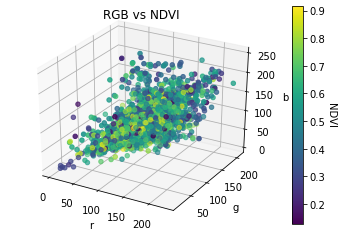

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ptx, pty, ptz = np.array(df['Med_r']), np.array(df['Med_g']), np.array(df['Med_b'])
values = np.array(df['NDVI'])

p = ax.scatter3D(ptx, pty, zs=ptz, c=values, cmap='viridis')

cbar = fig.colorbar(p, ax=ax)
cbar.ax.set_ylabel('NDVI', rotation=270, labelpad=10)
plt.title("RGB vs NDVI")
ax.set_xlabel("r")
ax.set_ylabel("g")
ax.set_zlabel("b")
plt.savefig("3D_rgb_v_ndvi.jpg")
files.download("3D_rgb_v_ndvi.jpg")
plt.show()

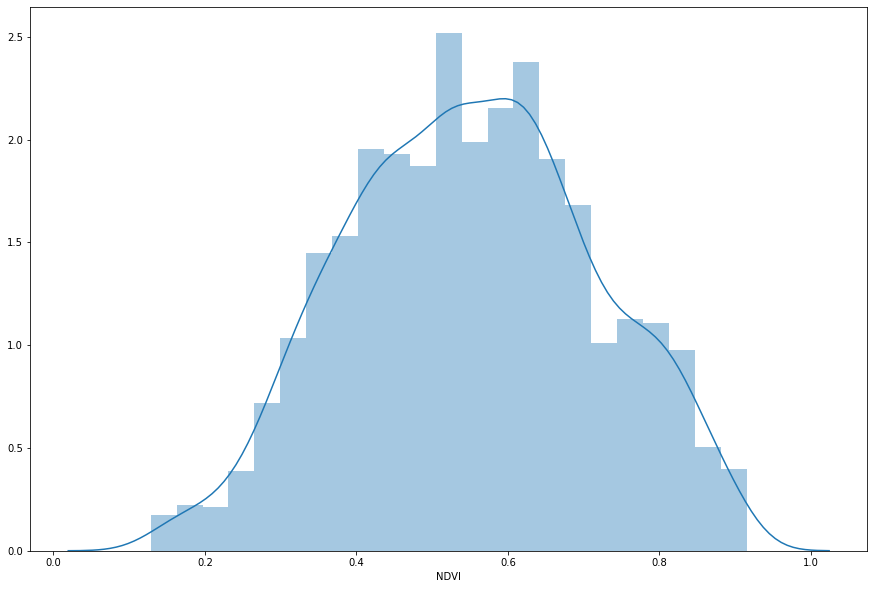

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['NDVI'])

##**Step 4** -- Why Multiple LINEAR Regression Model?

> Visualize the relationship between each feature and the response using scatterplots

> No Scatterplot has stronger relationship with NDVI, so must be multiple LINEAR regressive model, rather than multiple POLYNOMIAL regressive model

> NOTE: Shaded Region represents 95% Confidence Interval

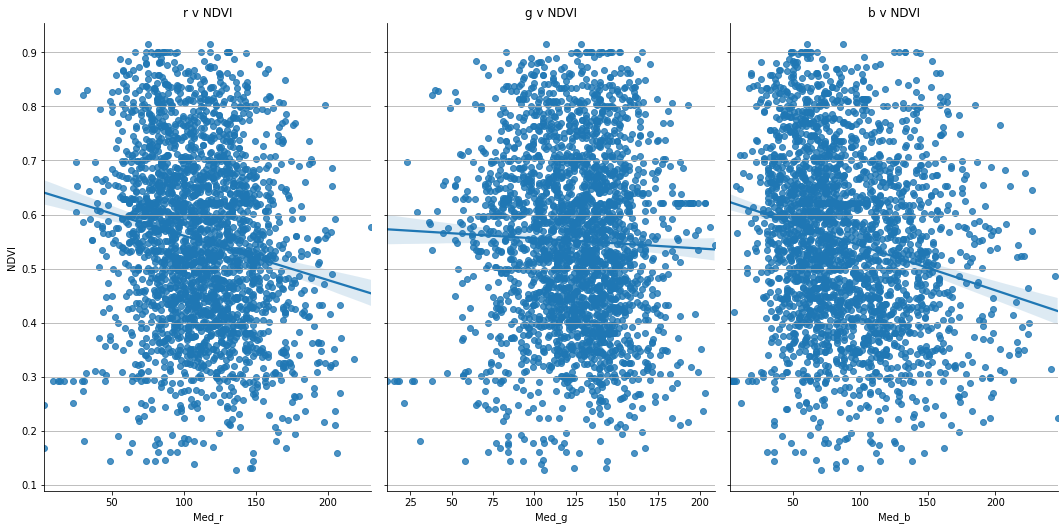

In [ ]:
f = sns.pairplot(df,x_vars=['Med_r','Med_g','Med_b'],y_vars='NDVI', height=7, aspect=0.7, kind='reg').fig
#f = f.fig
# Use semantically meaningful titles for the columns
titles = ["r v NDVI", "g v NDVI", "b v NDVI"]

for ax, title in zip(f.axes, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

#f.write_image(file='Pairplot of RGB Values vs NDVI', format='.png')
#files.download("Pairplot of RGB Values vs NDVI")

#plt.title("RGB Values vs NDVI")
#kind='reg' adds line of best fit && 95%confidence

##**Step 5** -- Multiple Linear Regression

>$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
* $\hat{y}$ is the predicted response
* $\beta_0$ is the intercept
* $\beta_1$ is the coefficient for $x_1$ (first feature)
* $\beta_n$ is the coefficient for $x_n$ (nth feature)

> In this case:
* $\widehat{NDVI} = \beta_0 + \beta_1 \times r + \beta_2 \times g + \beta_3 \times b$

###**Step 5.A** -- Defining x/features & y/response

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
feature_names = ['Med_r','Med_g','Med_b']

In [ ]:
x = df[['Med_r','Med_g','Med_b']].values
y = df['NDVI'].values

#OR Can do this:
#x = np.column_stack((df['Med_r'],df['Med_g'],df['Med_b']))
#y = df['NDVI'].values

###**Step 5.B** -- Determining optimal Random_State
> Which random_state works best for our data? (Results in lowest RSME?)

In [ ]:
rand_range = range(501)
rmse_scores = []
for k in rand_range:
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=k)
  linreg = LinearRegression()
  linreg.fit(x_train,y_train)
  y_pred = linreg.predict(x_test)
  val = (np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
  rmse_scores.append(val) #DONT FORGET GOTTA AVG
min = np.min(rmse_scores)
print(min)
rand_st = np.argmin(rmse_scores)
rand_st

0.14348046786551183


130

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

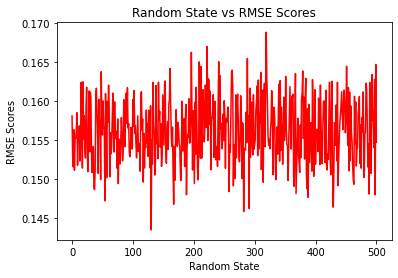

In [ ]:
plt.plot(rand_range, rmse_scores, 'r')
plt.xlabel('Random State')
plt.ylabel('RMSE Scores')
plt.title("Random State vs RMSE Scores")
plt.savefig("Random_State_vs_RMSE_Scores.png")
files.download("Random_State_vs_RMSE_Scores.png")
plt.show()

###**Step 5.C** -- Performing Multiple Linear Regression using Random_State

In [ ]:
indices = np.array(df['ID'])
x_train, x_test, y_train, y_test, indx_train, indx_test = train_test_split(x, y, indices, test_size=0.20, random_state=rand_st)

In [ ]:
#print(indx_test)

In [ ]:
#instantiate
linreg = LinearRegression()

#model-training/fitting
model = linreg.fit(x_train,y_train)

In [ ]:
#print intercept & coefficients
print(linreg.intercept_) #the trailing _ means that this attribute was ESTIMATED
print(linreg.coef_)

0.5758681819753635
[-0.00149881  0.00184785 -0.00094755]


In [ ]:
y_pred = linreg.predict(x_test)

Therefore, our function is as follows:


$$\widehat{NDVI} = 0.5758681819753635 + (-0.00149881) \times r + (0.00184785) \times g + (-0.00094755) \times b$$


###**Step 5.D** -- Visualizing LSRL?????
> Dont run this section ... still gotta figure out how to add LSRL

###CREATE SUMMARY DF WITH RGB & PRED

In [ ]:
residuals = y_test - y_pred
compare_df = pd.DataFrame({'ID':indx_test,'Actual': y_test, 'Predicted': y_pred, 'Residuals':residuals, 'Absolute Val of Residuals':abs(residuals)})
compare_df

ID  Actual  Predicted  Residuals  Absolute Val of Residuals
0    1111  0.4435   0.482444  -0.038944                   0.038944
1    2155  0.4942   0.546077  -0.051877                   0.051877
2    1381  0.2624   0.501406  -0.239006                   0.239006
3     776  0.4652   0.539462  -0.074262                   0.074262
4    1603  0.3894   0.594099  -0.204699                   0.204699
..    ...     ...        ...        ...                        ...
492  2171  0.4474   0.555978  -0.108578                   0.108578
493   968  0.6208   0.637819  -0.017019                   0.017019
494   791  0.6276   0.553555   0.074045                   0.074045
495   861  0.4432   0.537725  -0.094525                   0.094525
496  1784  0.6596   0.616359   0.043241                   0.043241

[497 rows x 5 columns]

In [ ]:
rgb_and_pred_ndvi = compare_df[['ID','Actual','Predicted']]
rgb_and_pred_ndvi

ID  Actual  Predicted
0    1111  0.4435   0.482444
1    2155  0.4942   0.546077
2    1381  0.2624   0.501406
3     776  0.4652   0.539462
4    1603  0.3894   0.594099
..    ...     ...        ...
492  2171  0.4474   0.555978
493   968  0.6208   0.637819
494   791  0.6276   0.553555
495   861  0.4432   0.537725
496  1784  0.6596   0.616359

[497 rows x 3 columns]

In [ ]:
mini_rgb_df = []
def get_rgb_vals_from_df(ID):
  Med_r = rgb_vals['Median r'][ID]
  Med_g = rgb_vals['Median g'][ID]
  Med_b = rgb_vals['Median b'][ID]
  dict_row = {'Med r':Med_r, 'Med g':Med_g, 'Med b':Med_b}
  return(dict_row)

for i in rgb_and_pred_ndvi['ID']:
  mini_rgb_df.append(get_rgb_vals_from_df(i))


mini_rgb_df = pd.DataFrame(mini_rgb_df)
mini_rgb_df


Med r  Med g  Med b
0    142.0  120.0  108.0
1     85.0   80.0   53.0
2    115.0  154.0  197.0
3    105.0  107.0   81.0
4    115.0  137.5   67.0
..     ...    ...    ...
492  123.0  129.0   78.0
493  121.0  185.0  104.0
494   90.0   84.0   45.0
495   95.0  100.0   85.0
496   86.0  105.0   26.0

[497 rows x 3 columns]

In [ ]:
rgb_and_pred_ndvi['Med r'] = mini_rgb_df['Med r']
rgb_and_pred_ndvi['Med g'] = mini_rgb_df['Med g']
rgb_and_pred_ndvi['Med b'] = mini_rgb_df['Med b']
rgb_and_pred_ndvi['Predicted NDVI'] = rgb_and_pred_ndvi['Predicted']
rgb_and_pred_ndvi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ID  Actual  Predicted  Med r  Med g  Med b  Predicted NDVI
0    1111  0.4435   0.482444  142.0  120.0  108.0        0.482444
1    2155  0.4942   0.546077   85.0   80.0   53.0        0.546077
2    1381  0.2624   0.501406  115.0  154.0  197.0        0.501406
3     776  0.4652   0.539462  105.0  107.0   81.0        0.539462
4    1603  0.3894   0.594099  115.0  137.5   67.0        0.594099
..    ...     ...        ...    ...    ...    ...             ...
492  2171  0.4474   0.555978  123.0  129.0   78.0        0.555978
493   968  0.6208   0.637819  121.0  185.0  104.0        0.637819
494   791  0.6276   0.553555   90.0   84.0   45.0        0.553555
495   861  0.4432   0.537725   95.0  100.0   85.0        0.537725
496  1784  0.6596   0.616359   86.0  105.0   26.0        0.616359

[497 rows x 7 columns]

In [ ]:
rgb_and_pred_ndvi = rgb_and_pred_ndvi[['ID','Med r', 'Med g', 'Med b', 'Predicted NDVI']]
rgb_and_pred_ndvi

ID  Med r  Med g  Med b  Predicted NDVI
0    1111  142.0  120.0  108.0        0.482444
1    2155   85.0   80.0   53.0        0.546077
2    1381  115.0  154.0  197.0        0.501406
3     776  105.0  107.0   81.0        0.539462
4    1603  115.0  137.5   67.0        0.594099
..    ...    ...    ...    ...             ...
492  2171  123.0  129.0   78.0        0.555978
493   968  121.0  185.0  104.0        0.637819
494   791   90.0   84.0   45.0        0.553555
495   861   95.0  100.0   85.0        0.537725
496  1784   86.0  105.0   26.0        0.616359

[497 rows x 5 columns]

**Method** -- Given residual target, find the corressponding image

#Section 8 -- Evaluating accuracy of our Multiple Regression Model

##**Step 1** -- Visualizing True vs Predicted NDVI

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df1.head(25)
df1

Actual  Predicted
0   0.4435   0.482444
1   0.4942   0.546077
2   0.2624   0.501406
3   0.4652   0.539462
4   0.3894   0.594099
5   0.6019   0.573527
6   0.4634   0.578714
7   0.4006   0.588671
8   0.7029   0.654333
9   0.2764   0.626274
10  0.6734   0.637601
11  0.5745   0.630623
12  0.5101   0.535540
13  0.2784   0.557009
14  0.4732   0.569538
15  0.5675   0.548572
16  0.7242   0.609263
17  0.5231   0.604159
18  0.4312   0.583115
19  0.5473   0.546996
20  0.6730   0.605100
21  0.3562   0.563360
22  0.4108   0.565403
23  0.4830   0.554605
24  0.5362   0.479816

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

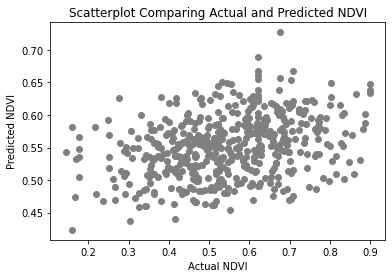

In [ ]:
plt.scatter(y_test, y_pred,c='grey')
plt.title("Scatterplot Comparing Actual and Predicted NDVI")
plt.xlabel("Actual NDVI")
plt.ylabel("Predicted NDVI")
plt.savefig("Scatterplot Comparing Actual and Predicted NDVI.png")
files.download("Scatterplot Comparing Actual and Predicted NDVI.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

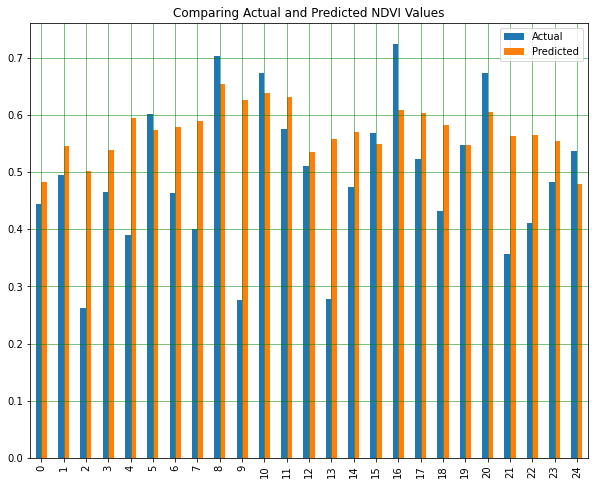

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title("Comparing Actual and Predicted NDVI Values")
plt.savefig("Comparing Actual and Predicted NDVI Values.png")
files.download("Comparing Actual and Predicted NDVI Values.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

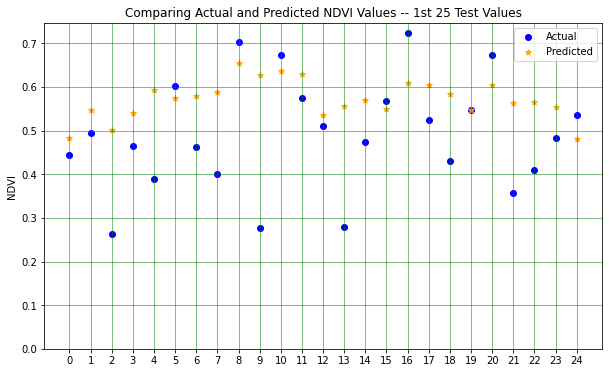

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(df1.index, df1['Actual'], color='blue', marker='o', label='Actual')
plt.scatter(df1.index, df1['Predicted'], color='orange', marker='*', label='Predicted')
plt.xticks(np.arange(0, 25, 1.0))
plt.ylim(0)
plt.legend(loc="upper right")
plt.title("Comparing Actual and Predicted NDVI Values -- 1st 25 Test Values")
plt.ylabel("NDVI")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("Comparing Actual and Predicted NDVI Values -- 1st 25 Test Values.png")
files.download("Comparing Actual and Predicted NDVI Values -- 1st 25 Test Values.png")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

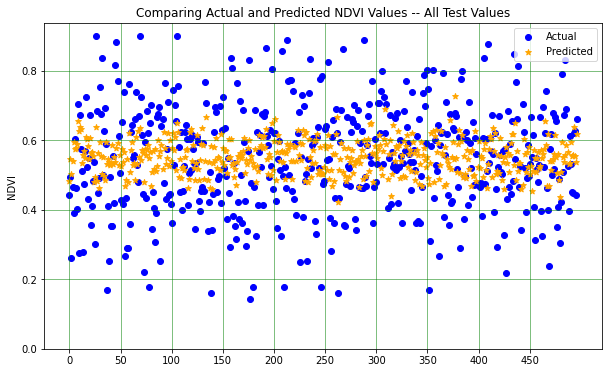

In [ ]:
fig = plt.figure(figsize=(10,6))
plt.scatter(compare_df.index, compare_df['Actual'], color='blue', marker='o', label='Actual')
plt.scatter(compare_df.index, compare_df['Predicted'], color='orange', marker='*', label='Predicted')
plt.xticks(np.arange(0, 500, 50.0))
plt.ylim(0)
plt.legend(loc="upper right")
plt.title("Comparing Actual and Predicted NDVI Values -- All Test Values")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("NDVI")
plt.savefig("Comparing Actual and Predicted NDVI Values -- All Test Values.png")
files.download("Comparing Actual and Predicted NDVI Values -- All Test Values.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

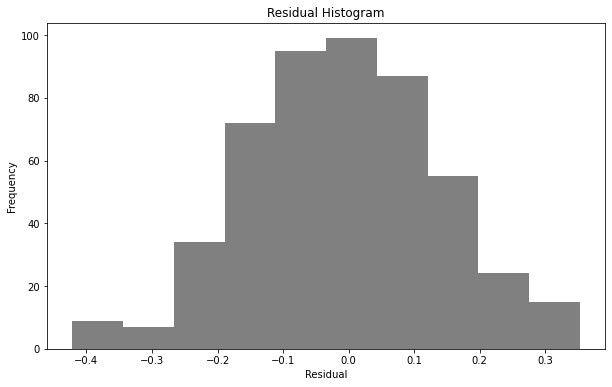

In [ ]:
residuals = y_test - y_pred
fig = plt.figure(figsize=(10,6))
plt.title("Residual Histogram")
plt.hist(residuals,color='grey')
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.savefig("Residuals Histogram.png")
files.download("Residuals Histogram.png")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

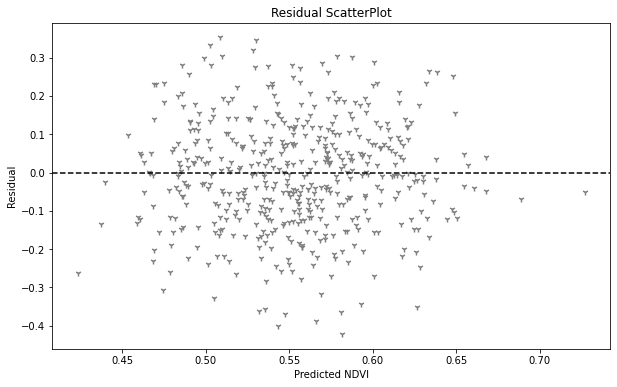

In [ ]:
residuals = y_test - y_pred
fig = plt.figure(figsize=(10,6))
plt.title("Residual ScatterPlot")
plt.scatter(y_pred, residuals,color='grey',marker='1' )
plt.xlabel("Predicted NDVI")
plt.ylabel("Residual")
plt.axhline(y=0, color='k', ls='--')
plt.savefig("Residuals Scatterplot.png")
files.download("Residuals Scatterplot.png")
plt.show()

##**Step 2** -- A Closer Look at Residuals
> Create residuals_df with following columns: index, y_test, y_pred, residual, absolute value of residual

In [ ]:
compare_df

ID  Actual  Predicted  Residuals  Absolute Val of Residuals
0    1111  0.4435   0.482444  -0.038944                   0.038944
1    2155  0.4942   0.546077  -0.051877                   0.051877
2    1381  0.2624   0.501406  -0.239006                   0.239006
3     776  0.4652   0.539462  -0.074262                   0.074262
4    1603  0.3894   0.594099  -0.204699                   0.204699
..    ...     ...        ...        ...                        ...
492  2171  0.4474   0.555978  -0.108578                   0.108578
493   968  0.6208   0.637819  -0.017019                   0.017019
494   791  0.6276   0.553555   0.074045                   0.074045
495   861  0.4432   0.537725  -0.094525                   0.094525
496  1784  0.6596   0.616359   0.043241                   0.043241

[497 rows x 5 columns]

In [ ]:
df1['Absolute Val of Residuals'] = compare_df['Absolute Val of Residuals']
df1

Actual  Predicted  Absolute Val of Residuals
0   0.4435   0.482444                   0.038944
1   0.4942   0.546077                   0.051877
2   0.2624   0.501406                   0.239006
3   0.4652   0.539462                   0.074262
4   0.3894   0.594099                   0.204699
5   0.6019   0.573527                   0.028373
6   0.4634   0.578714                   0.115314
7   0.4006   0.588671                   0.188071
8   0.7029   0.654333                   0.048567
9   0.2764   0.626274                   0.349874
10  0.6734   0.637601                   0.035799
11  0.5745   0.630623                   0.056123
12  0.5101   0.535540                   0.025440
13  0.2784   0.557009                   0.278609
14  0.4732   0.569538                   0.096338
15  0.5675   0.548572                   0.018928
16  0.7242   0.609263                   0.114937
17  0.5231   0.604159                   0.081059
18  0.4312   0.583115                   0.151915
19  0.5473   0.546996                   0.000304
20  0.6730   0.605100                   0.067900
21  0.3562   0.563360                   0.207160
22  0.4108   0.565403                   0.154603
23  0.4830   0.554605                   0.071605
24  0.5362   0.479816                   0.056384

##**Step 3** -- Extracting examples of great, ok, and bad predictions

In [ ]:
def get_img_from_resid(target_resid):
  #pic_loc = df1[ (df1['Absolute Val of Residuals'] == target_resid ) ].index
  pic_loc = compare_df[ (compare_df['Absolute Val of Residuals'] == target_resid ) ].index
  pic_loc = pic_loc[0]

  print("Actual NDVI:",compare_df['Actual'][pic_loc])
  print("Predicted NDVI:", compare_df['Predicted'][pic_loc])
  print("Absolute Value of Residual: ", target_resid)

  id_pic = int(compare_df['ID'][pic_loc])
  latitude = globe_df['Latitude'][id_pic]
  longitude = globe_df['Longitude'][id_pic]
  print('Latitude: "{la}", Longitude: "{lo}"'.format(la = latitude,lo = longitude))
  globe_pic_loc = globe_df['Measured Value'][id_pic]
  #print(globe_pic_loc)
  img = get_img_from_url(globe_pic_loc)
  convert_to_thumbnail(img,(500,500,3))
  return img


In [ ]:
#Finding pics for 1st 25 test images
org_compare_df = compare_df.sort_values(by=['Absolute Val of Residuals'])
abs_resid = np.array(org_compare_df['Absolute Val of Residuals'])

**Sort df1 in ascending order for Absolute Value of Residual**

In [ ]:
df1 = df1.sort_values(by=['Absolute Val of Residuals'])
df1.reset_index(inplace=True, drop=True)
df1

Actual  Predicted  Absolute Val of Residuals
0   0.5473   0.546996                   0.000304
1   0.5675   0.548572                   0.018928
2   0.5101   0.535540                   0.025440
3   0.6019   0.573527                   0.028373
4   0.6734   0.637601                   0.035799
5   0.4435   0.482444                   0.038944
6   0.7029   0.654333                   0.048567
7   0.4942   0.546077                   0.051877
8   0.5745   0.630623                   0.056123
9   0.5362   0.479816                   0.056384
10  0.6730   0.605100                   0.067900
11  0.4830   0.554605                   0.071605
12  0.4652   0.539462                   0.074262
13  0.5231   0.604159                   0.081059
14  0.4732   0.569538                   0.096338
15  0.7242   0.609263                   0.114937
16  0.4634   0.578714                   0.115314
17  0.4312   0.583115                   0.151915
18  0.4108   0.565403                   0.154603
19  0.4006   0.588671                   0.188071
20  0.3894   0.594099                   0.204699
21  0.3562   0.563360                   0.207160
22  0.2624   0.501406                   0.239006
23  0.2784   0.557009                   0.278609
24  0.2764   0.626274                   0.349874

In [ ]:
#sort compare_df & df1 based on residuals
import numpy as np


###**Step 2.A** -- Example of a Great Prediction

Actual NDVI: 0.5473
Predicted NDVI: 0.5469963429292206
Absolute Value of Residual:  0.0003036570707793951
Latitude: "34.14005", Longitude: "-118.16705"


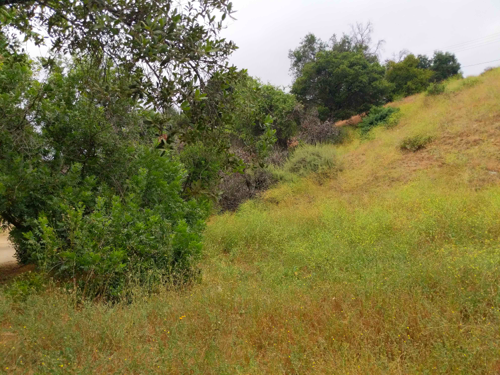

In [ ]:
min = np.min(abs_resid)
#min_1 = abs_resid[2]
image_best = get_img_from_resid(min)
image_best

###**Step 2.B** -- Example of a Mediocre Prediction

Actual NDVI: 0.4816
Predicted NDVI: 0.5233612216233733
Absolute Value of Residual:  0.04176122162337331
Latitude: "30.536620000000003", Longitude: "-97.86268000000001"


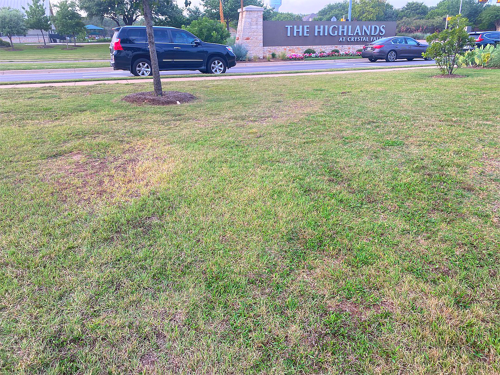

In [ ]:
last_index = org_compare_df.shape[0] - 1
med_index = int((last_index - 0)/2 + 1)
med_resid = org_compare_df['Absolute Val of Residuals'][med_index]
image_ok = get_img_from_resid(med_resid)
image_ok

###**Step 2.C** -- Example of a Not-so-great Prediction

Actual NDVI: 0.17800000000000002
Predicted NDVI: 0.5473215498447924
Absolute Value of Residual:  0.3693215498447924
Latitude: "33.506890000000006", Longitude: "-86.80404"


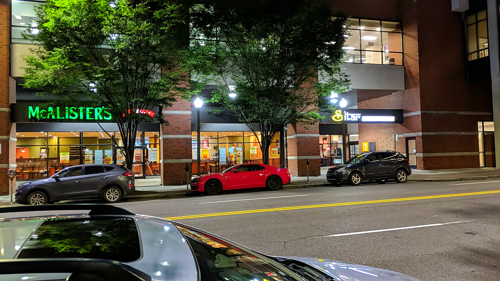

In [ ]:
#max = np.max(abs_resid)
max = abs_resid[len(abs_resid)-4]
image_worst = get_img_from_resid(max)
image_worst

###**General Testing**

Actual: 0.1605
Predicted: 0.5818754468281209
Absolute Value of Residual:  0.4213754468281209


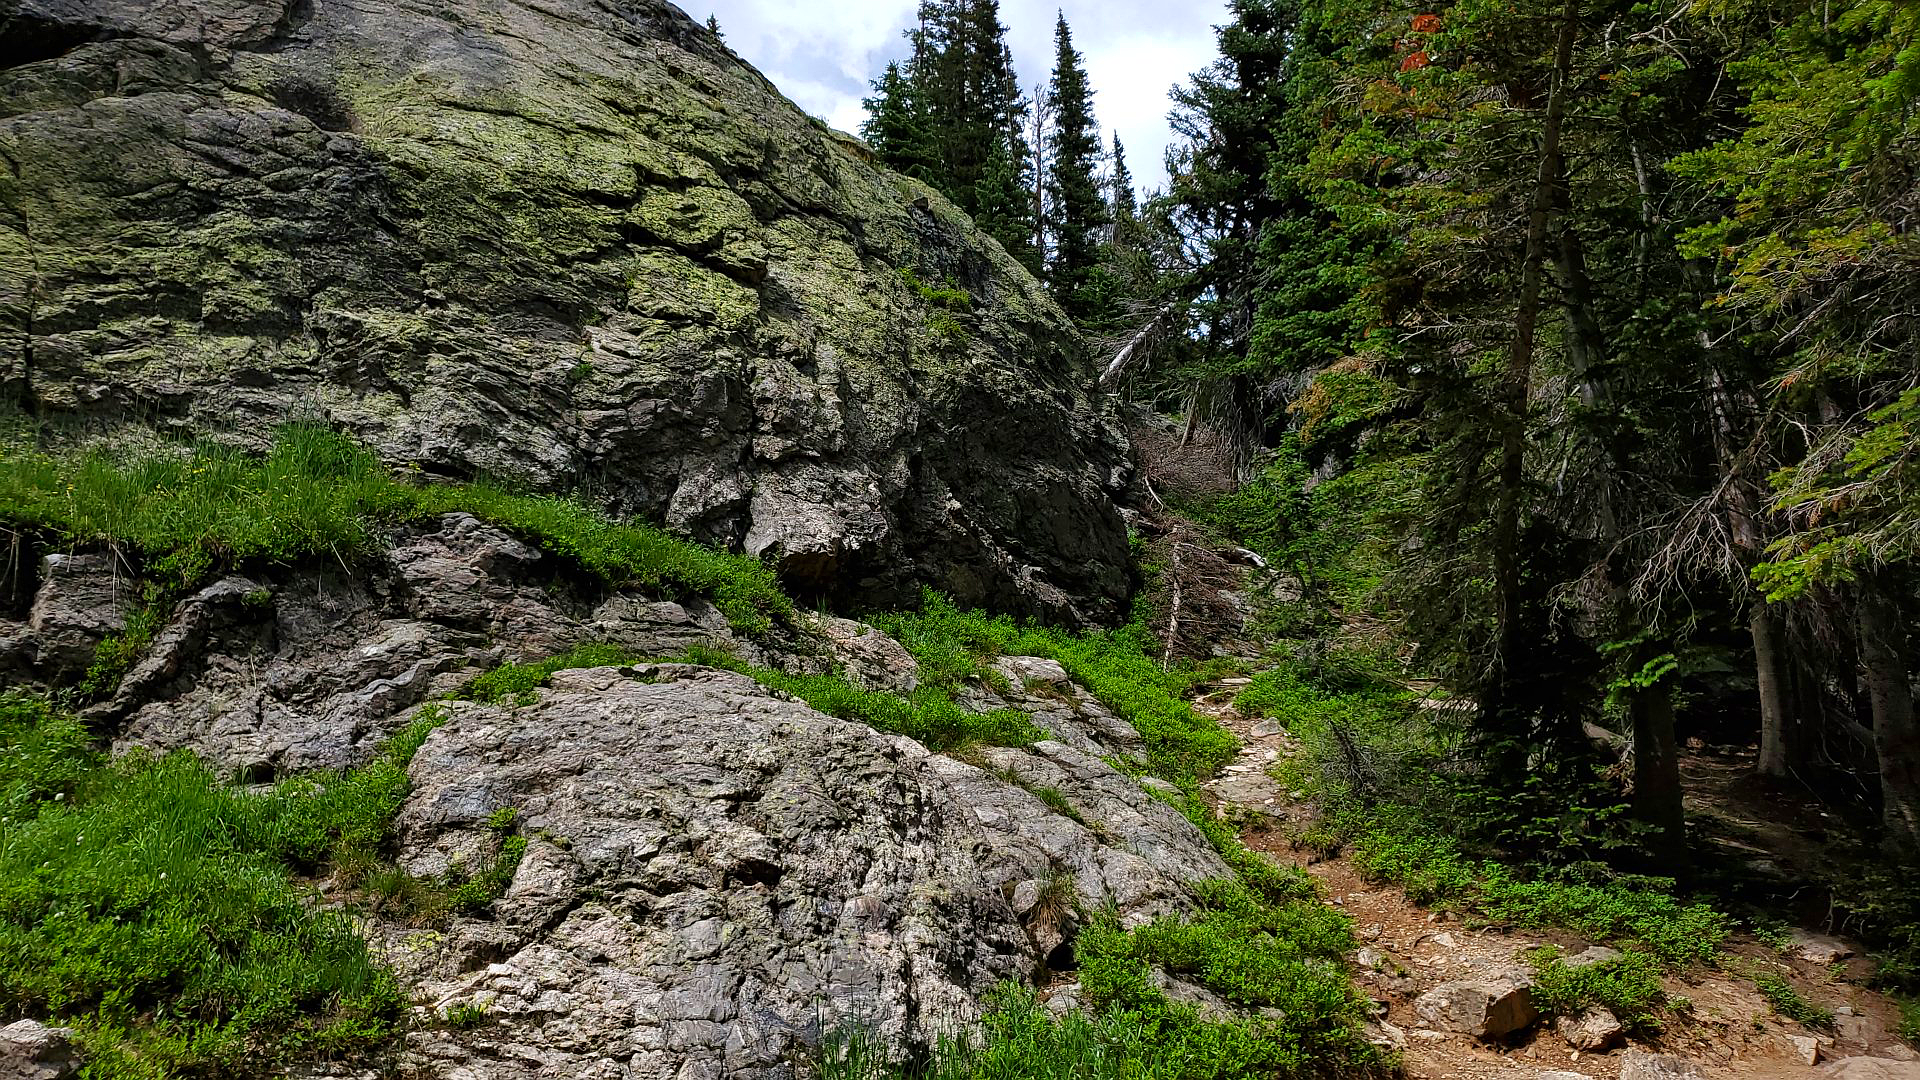

In [ ]:
abs_resid = np.array(compare_df['Absolute Val of Residuals'])
target_resid = np.max(abs_resid)
pic_loc = compare_df[ (compare_df['Absolute Val of Residuals'] == target_resid ) ].index
pic_loc = pic_loc[0]

print("Actual:",compare_df['Actual'][pic_loc])
print("Predicted:", compare_df['Predicted'][pic_loc])
print("Absolute Value of Residual: ", target_resid)

id_pic = int(compare_df['ID'][pic_loc])
globe_pic_loc = globe_df['Measured Value'][id_pic]
img = get_img_from_url(globe_pic_loc)
img

##**Step 4** - Standard Evaluation Metrics Calculations

###Linear Regression Evaluation Metrics
1. ***MEAN ABSOLUTE ERROR (MAE)*** -- mean of absolute value of errors
$$MAE = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
2. ***MEAN SQUARED ERROR (MSE)*** -- mean of the squared errors
$$MSE = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
3. ***ROOT MEAN SQUARED ERROR (RMSE)*** --  square root of MSE
$$RMSE = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
#Standard Deviation
np.std(y_test)

0.1514697300796303

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1149349372711858
Mean Squared Error: 0.02058664465890617
Root Mean Squared Error: 0.14348046786551183


$NDVI = \frac {NIR - R}{NIR + R}$

#Potential Extensions
> Create a GUI that immediately predicts NDVI from image

> Examine other curve-fitting models and compare results

> Explore relationships between feature classifciation and r, g, and b ratios
